In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def names_to_times(names):
    times = []
    for n in names:
        name = os.path.split(n)[1]
        times.append(pd.to_datetime(name[1:-4]))
    return times

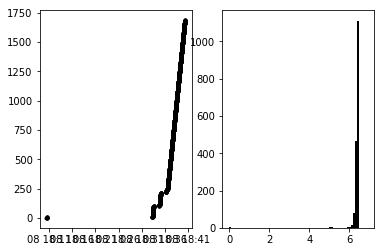

In [42]:
datadir = '/mnt/ARRAY/ENTICE/Data/STN01/'

files = [os.path.join(datadir, f) for f in
    sorted(os.listdir(datadir))
    if f.endswith('.bmp')]

times = names_to_times(files)

hz = []
for i in range(len(files)-1):
    dt = times[i+1] - times[i]
    dt = dt / np.timedelta64(1, 's')
    hz.append(1/dt)

f, a = plt.subplots(1,2)
plt.sca(a[0])
plt.plot(times,np.arange(0,len(files)),'k.')

plt.sca(a[1])
# plt.plot(times[0:-1],hz,'k.')
plt.hist(hz,bins=np.arange(0,7,0.1),color='k')

print('')